In [1]:
#This analysis is for a project listed on Kaggle. It can be found here:
#https://www.kaggle.com/c/liberty-mutual-group-property-inspection-prediction
#This project is aimed at assigning properties a Hazard score to determine if properties require additional investigation

#import necessary modules
import json
import os
import glob
import pandas as pd 
from pyxlsb import open_workbook
#read in dataset
inspection_data=pd.read_csv("C:/Users/emccall/Downloads/liberty-mutual-group-property-inspection-prediction/train.csv")

In [2]:
#analyze column names
print(inspection_data.columns)

Index(['Id', 'Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6',
       'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13',
       'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3',
       'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15'],
      dtype='object')


In [3]:
#see what the data looks like
#mostly numeric variables
#there are some character variable we may have to decode
print(inspection_data.head(25))

    Id  Hazard  T1_V1  T1_V2  T1_V3 T1_V4 T1_V5 T1_V6 T1_V7 T1_V8  ... T2_V6  \
0    1       1     15      3      2     N     B     N     B     B  ...     2   
1    2       4     16     14      5     H     B     N     B     B  ...     2   
2    3       1     10     10      5     N     K     N     B     B  ...     6   
3    4       1     18     18      5     N     K     N     B     B  ...     2   
4    5       1     13     19      5     N     H     N     B     B  ...     1   
5   12       1     14     12      2     N     K     N     B     B  ...     1   
6   15       5      8     17      1     E     K     N     B     B  ...     2   
7   19       1     14     20      4     E     K     N     B     B  ...     2   
8   21       1      8      2      2     W     C     N     D     B  ...     1   
9   22       1      5      4      3     B     I     N     D     B  ...     4   
10  23       7      4      7      5     N     C     Y     B     B  ...     2   
11  24      15     18     15      4     

In [4]:
#examine data types
inspection_data.dtypes

Id         int64
Hazard     int64
T1_V1      int64
T1_V2      int64
T1_V3      int64
T1_V4     object
T1_V5     object
T1_V6     object
T1_V7     object
T1_V8     object
T1_V9     object
T1_V10     int64
T1_V11    object
T1_V12    object
T1_V13     int64
T1_V14     int64
T1_V15    object
T1_V16    object
T1_V17    object
T2_V1      int64
T2_V2      int64
T2_V3     object
T2_V4      int64
T2_V5     object
T2_V6      int64
T2_V7      int64
T2_V8      int64
T2_V9      int64
T2_V10     int64
T2_V11    object
T2_V12    object
T2_V13    object
T2_V14     int64
T2_V15     int64
dtype: object

In [5]:
#examine unique values of variable we are predicting
print(inspection_data['Hazard'].unique())

[ 1  4  5  7 15 14  8 16  6 11  3 13  2 18 10 17 22  9 21 20 12 19 37 23
 28 27 31 38 41 26 33 29 30 25 24 36 51 42 34 46 32 69 40 35 44 39 49 52
 63 64]


In [6]:
#examine unique values of a variable
#load all of the columns into a list
column_list=inspection_data.columns.tolist()
#loop through each of the column values, and print the unique values from the column
for var_name in column_list:
    
    print(var_name, ":", inspection_data[var_name].unique())

Id : [     1      2      3 ... 101994 101998 101999]
Hazard : [ 1  4  5  7 15 14  8 16  6 11  3 13  2 18 10 17 22  9 21 20 12 19 37 23
 28 27 31 38 41 26 33 29 30 25 24 36 51 42 34 46 32 69 40 35 44 39 49 52
 63 64]
T1_V1 : [15 16 10 18 13 14  8  5  4  3 11  9  7 12  6 19  1  2 17]
T1_V2 : [ 3 14 10 18 19 12 17 20  2  4  7 15 23  6 13  5 21 11  1  8  9 16 22 24]
T1_V3 : [2 5 1 4 3 6 9 7 8]
T1_V4 : ['N' 'H' 'E' 'W' 'B' 'C' 'S' 'G']
T1_V5 : ['B' 'K' 'H' 'C' 'I' 'A' 'D' 'J' 'E' 'L']
T1_V6 : ['N' 'Y']
T1_V7 : ['B' 'D' 'A' 'C']
T1_V8 : ['B' 'D' 'A' 'C']
T1_V9 : ['D' 'C' 'E' 'F' 'B' 'G']
T1_V10 : [ 7 12  3  8  2]
T1_V11 : ['B' 'H' 'I' 'M' 'L' 'J' 'E' 'A' 'F' 'N' 'D' 'K']
T1_V12 : ['B' 'C' 'D' 'A']
T1_V13 : [15 10 20  5]
T1_V14 : [1 3 2 4 0]
T1_V15 : ['A' 'D' 'C' 'H' 'N' 'S' 'W' 'F']
T1_V16 : ['B' 'R' 'J' 'K' 'D' 'C' 'N' 'E' 'I' 'F' 'M' 'H' 'A' 'Q' 'G' 'L' 'P' 'O']
T1_V17 : ['N' 'Y']
T2_V1 : [ 36  78  71  75  65 100  83  20  88  86  23  49  92  41  33  81  72  77
  61  38  18  32  98  60  52 

In [7]:
#find if there are any missing values
#create a dataset with only rows with at least one missing value
#to do so, drop records with any missing value, and then use the index from that dataset to create a dataset with the dropped records
#they are no missing values, so no need to make adjustments for missing values

inspection_data_no_na=inspection_data.dropna()
only_na = inspection_data[~inspection_data.index.isin(inspection_data_no_na.index)]

print(only_na)

print(inspection_data, inspection_data_no_na)


Empty DataFrame
Columns: [Id, Hazard, T1_V1, T1_V2, T1_V3, T1_V4, T1_V5, T1_V6, T1_V7, T1_V8, T1_V9, T1_V10, T1_V11, T1_V12, T1_V13, T1_V14, T1_V15, T1_V16, T1_V17, T2_V1, T2_V2, T2_V3, T2_V4, T2_V5, T2_V6, T2_V7, T2_V8, T2_V9, T2_V10, T2_V11, T2_V12, T2_V13, T2_V14, T2_V15]
Index: []

[0 rows x 34 columns]
           Id  Hazard  T1_V1  T1_V2  T1_V3 T1_V4 T1_V5 T1_V6 T1_V7 T1_V8  ...  \
0           1       1     15      3      2     N     B     N     B     B  ...   
1           2       4     16     14      5     H     B     N     B     B  ...   
2           3       1     10     10      5     N     K     N     B     B  ...   
3           4       1     18     18      5     N     K     N     B     B  ...   
4           5       1     13     19      5     N     H     N     B     B  ...   
...       ...     ...    ...    ...    ...   ...   ...   ...   ...   ...  ...   
50994  101992       7     12     24      1     N     H     Y     B     B  ...   
50995  101993       4     12     17      4 

In [8]:
#Create dummy variables for character variables in the data
inspection_data_no_id=inspection_data.drop(['Id'],axis=1)

inspection_data_dummies=pd.get_dummies(inspection_data_no_id)

In [9]:
inspection_data_dummies.dtypes
#create a list of all the columns in the new dataset
column_list=inspection_data_dummies.columns.tolist()
#loop through each of the column, and print the names of each column
for var_name in column_list:
    
    print(var_name)

Hazard
T1_V1
T1_V2
T1_V3
T1_V10
T1_V13
T1_V14
T2_V1
T2_V2
T2_V4
T2_V6
T2_V7
T2_V8
T2_V9
T2_V10
T2_V14
T2_V15
T1_V4_B
T1_V4_C
T1_V4_E
T1_V4_G
T1_V4_H
T1_V4_N
T1_V4_S
T1_V4_W
T1_V5_A
T1_V5_B
T1_V5_C
T1_V5_D
T1_V5_E
T1_V5_H
T1_V5_I
T1_V5_J
T1_V5_K
T1_V5_L
T1_V6_N
T1_V6_Y
T1_V7_A
T1_V7_B
T1_V7_C
T1_V7_D
T1_V8_A
T1_V8_B
T1_V8_C
T1_V8_D
T1_V9_B
T1_V9_C
T1_V9_D
T1_V9_E
T1_V9_F
T1_V9_G
T1_V11_A
T1_V11_B
T1_V11_D
T1_V11_E
T1_V11_F
T1_V11_H
T1_V11_I
T1_V11_J
T1_V11_K
T1_V11_L
T1_V11_M
T1_V11_N
T1_V12_A
T1_V12_B
T1_V12_C
T1_V12_D
T1_V15_A
T1_V15_C
T1_V15_D
T1_V15_F
T1_V15_H
T1_V15_N
T1_V15_S
T1_V15_W
T1_V16_A
T1_V16_B
T1_V16_C
T1_V16_D
T1_V16_E
T1_V16_F
T1_V16_G
T1_V16_H
T1_V16_I
T1_V16_J
T1_V16_K
T1_V16_L
T1_V16_M
T1_V16_N
T1_V16_O
T1_V16_P
T1_V16_Q
T1_V16_R
T1_V17_N
T1_V17_Y
T2_V3_N
T2_V3_Y
T2_V5_A
T2_V5_B
T2_V5_C
T2_V5_D
T2_V5_E
T2_V5_F
T2_V11_N
T2_V11_Y
T2_V12_N
T2_V12_Y
T2_V13_A
T2_V13_B
T2_V13_C
T2_V13_D
T2_V13_E


Hazard
T1_V1
T1_V2
T1_V3
T1_V10
T1_V13
T1_V14
T2_V1
T2_V2
T2_V4
T2_V6
T2_V7
T2_V8
T2_V9
T2_V10
T2_V14
T2_V15
T1_V4_B
T1_V4_C
T1_V4_E
T1_V4_G
T1_V4_H
T1_V4_N
T1_V4_S
T1_V4_W
T1_V5_A
T1_V5_B
T1_V5_C
T1_V5_D
T1_V5_E
T1_V5_H
T1_V5_I
T1_V5_J
T1_V5_K
T1_V5_L
T1_V6_N
T1_V6_Y
T1_V7_A
T1_V7_B
T1_V7_C
T1_V7_D
T1_V8_A
T1_V8_B
T1_V8_C
T1_V8_D
T1_V9_B
T1_V9_C
T1_V9_D
T1_V9_E
T1_V9_F
T1_V9_G
T1_V11_A
T1_V11_B
T1_V11_D
T1_V11_E
T1_V11_F
T1_V11_H
T1_V11_I
T1_V11_J
T1_V11_K
T1_V11_L
T1_V11_M
T1_V11_N
T1_V12_A
T1_V12_B
T1_V12_C
T1_V12_D
T1_V15_A
T1_V15_C
T1_V15_D
T1_V15_F
T1_V15_H
T1_V15_N
T1_V15_S
T1_V15_W
T1_V16_A
T1_V16_B
T1_V16_C
T1_V16_D
T1_V16_E
T1_V16_F
T1_V16_G
T1_V16_H
T1_V16_I
T1_V16_J
T1_V16_K
T1_V16_L
T1_V16_M
T1_V16_N
T1_V16_O
T1_V16_P
T1_V16_Q
T1_V16_R
T1_V17_N
T1_V17_Y
T2_V3_N
T2_V3_Y
T2_V5_A
T2_V5_B
T2_V5_C
T2_V5_D
T2_V5_E
T2_V5_F
T2_V11_N
T2_V11_Y
T2_V12_N
T2_V12_Y
T2_V13_A
T2_V13_B
T2_V13_C
T2_V13_D
T2_V13_E


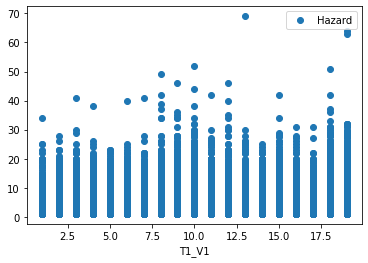

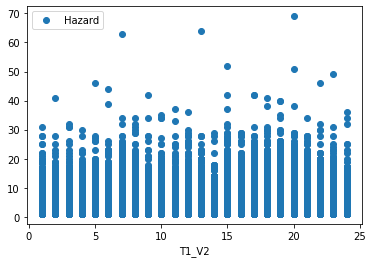

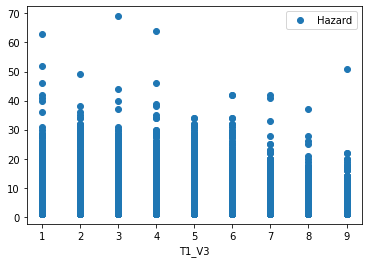

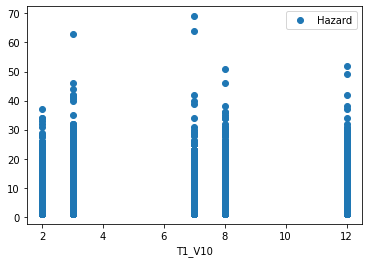

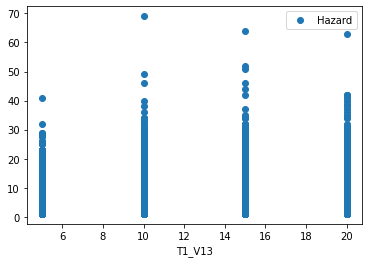

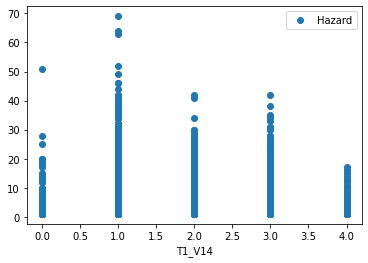

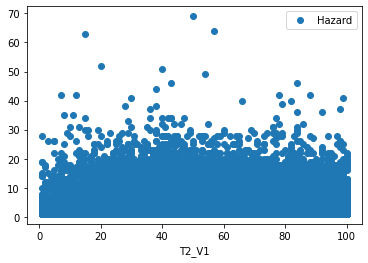

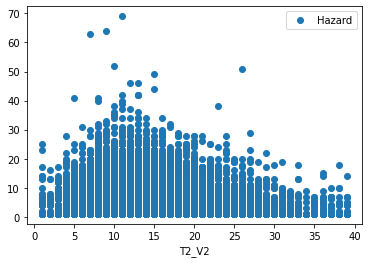

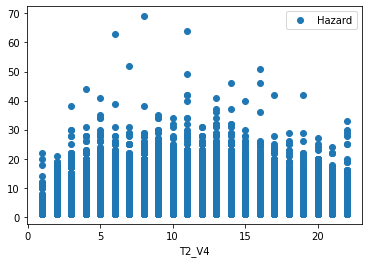

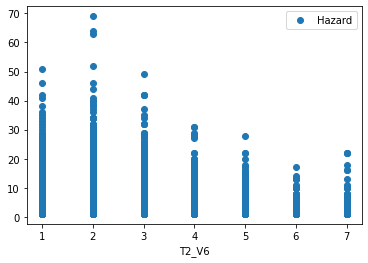

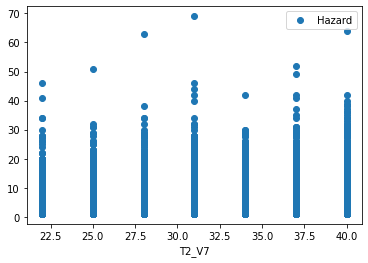

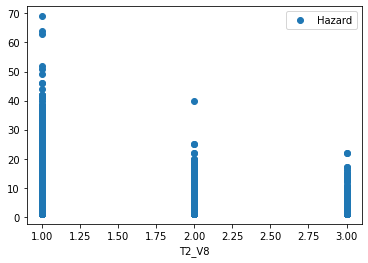

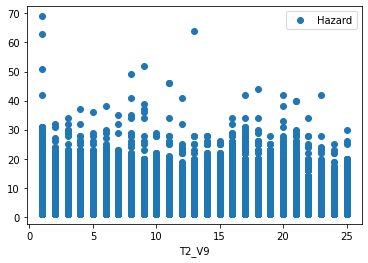

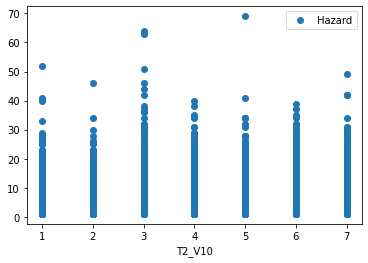

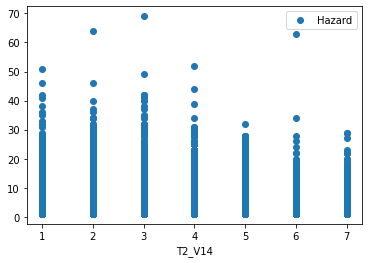

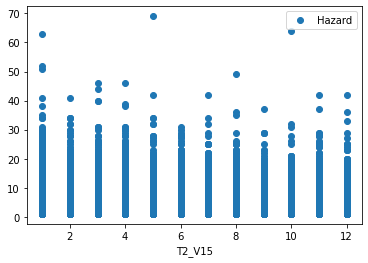

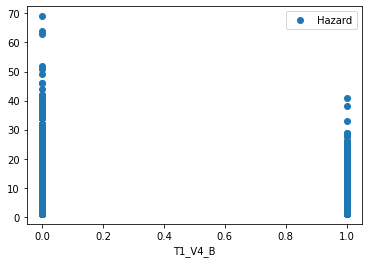

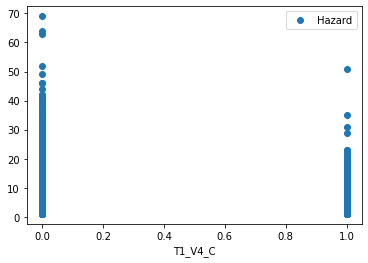

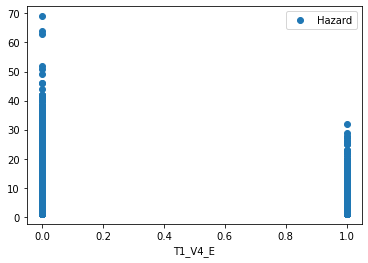

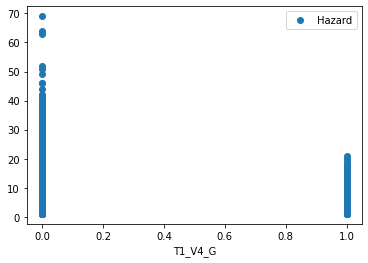

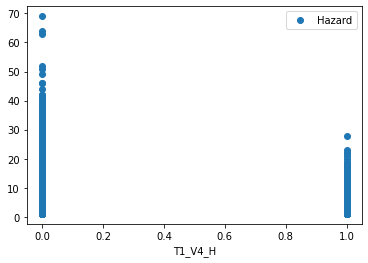

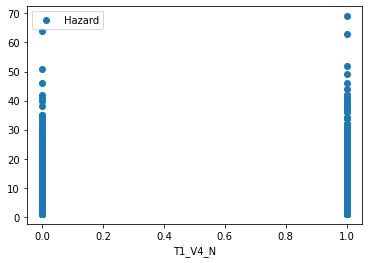

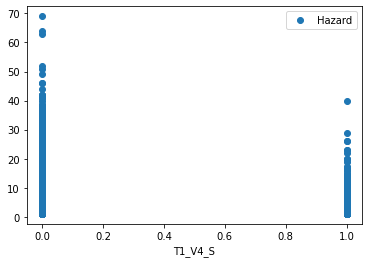

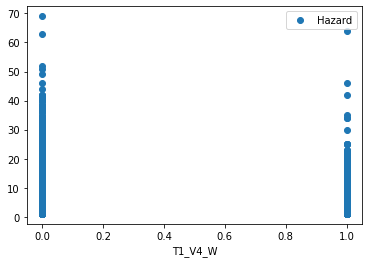

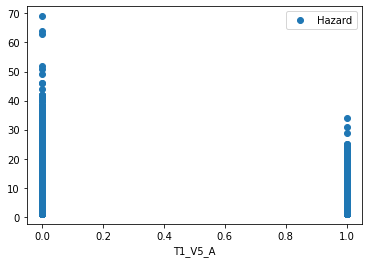

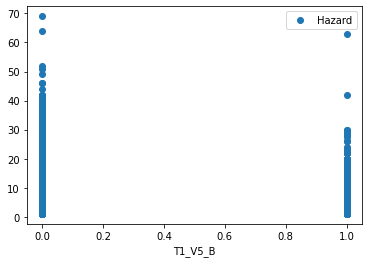

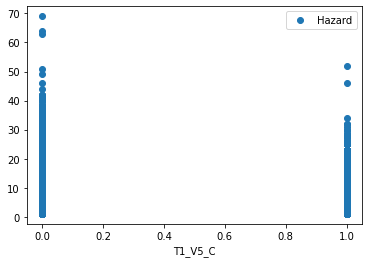

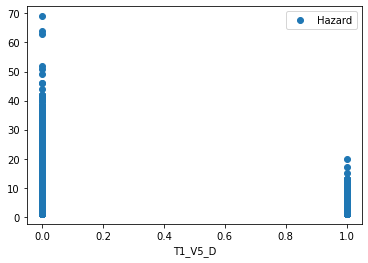

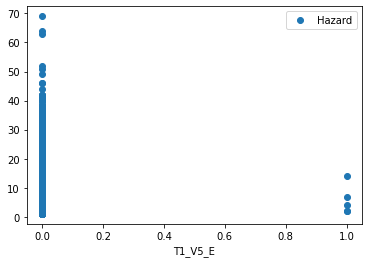

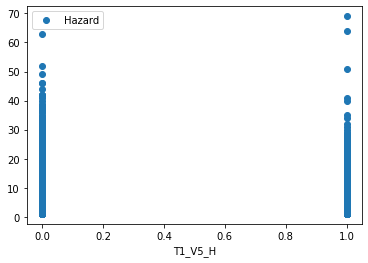

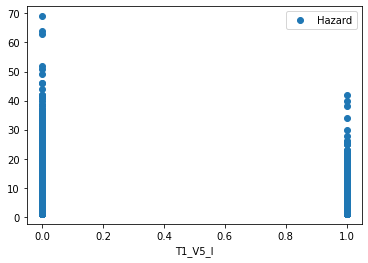

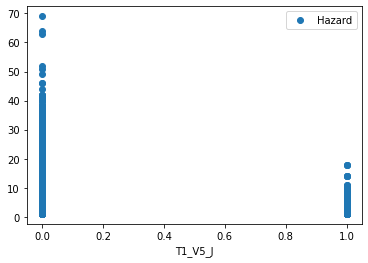

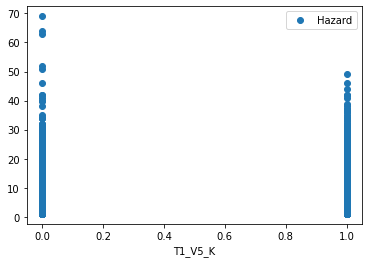

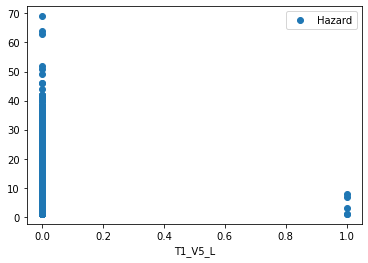

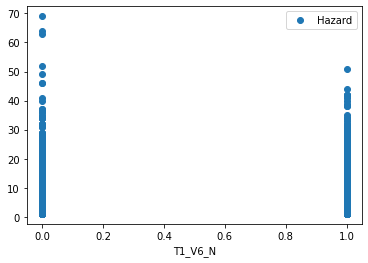

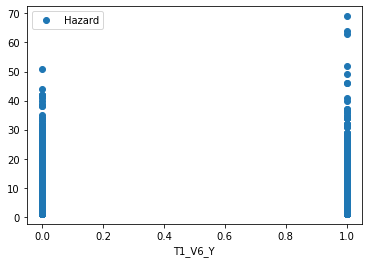

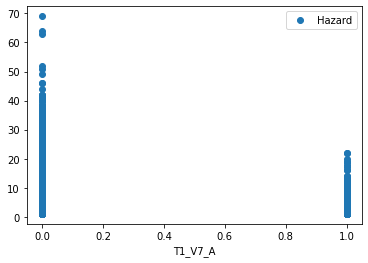

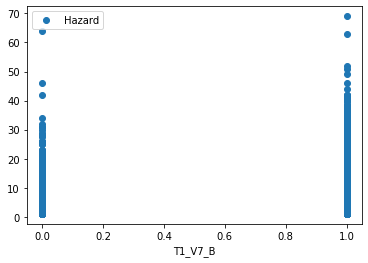

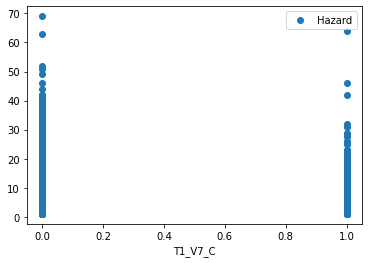

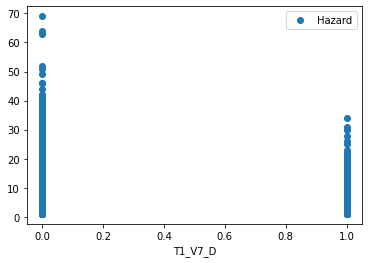

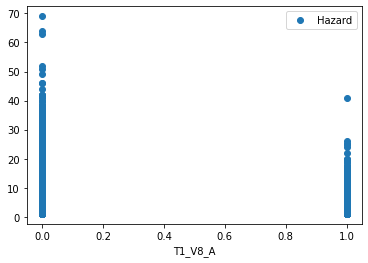

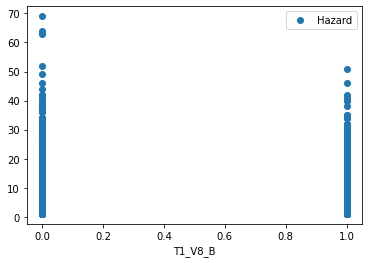

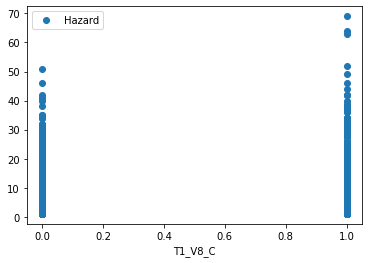

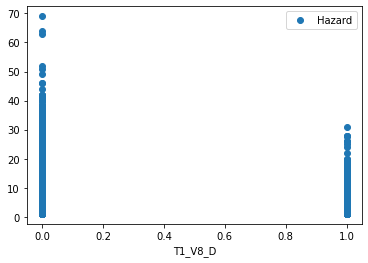

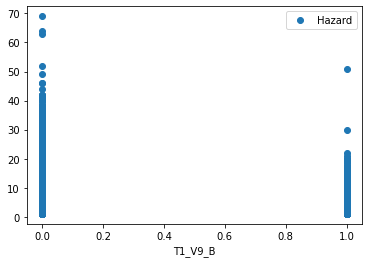

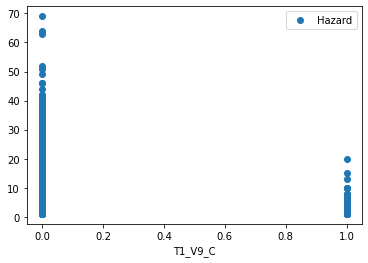

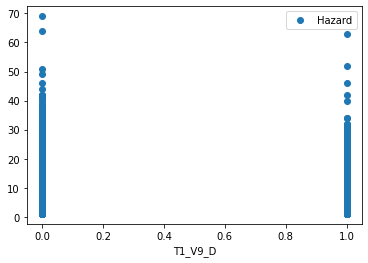

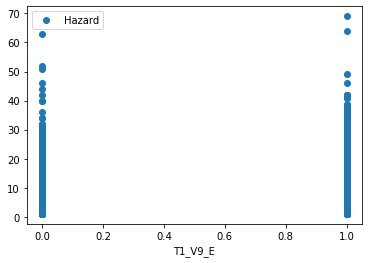

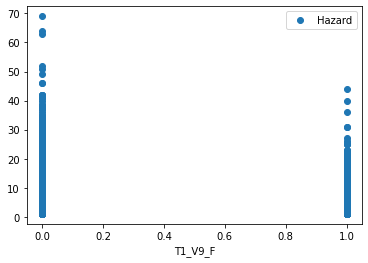

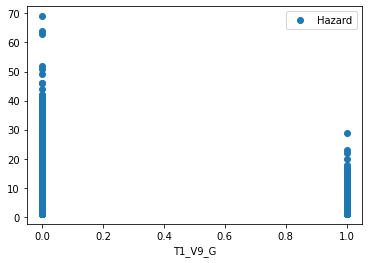

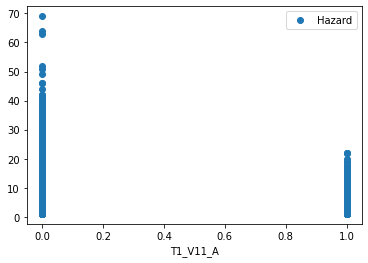

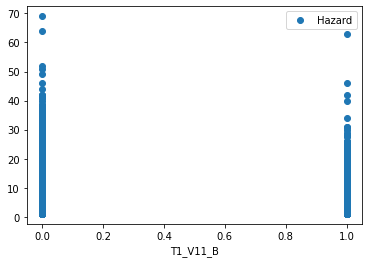

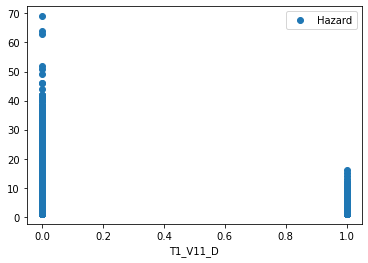

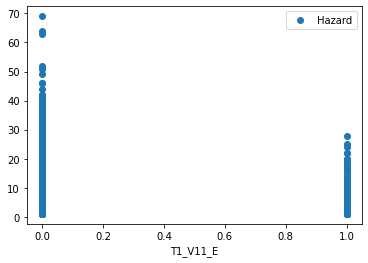

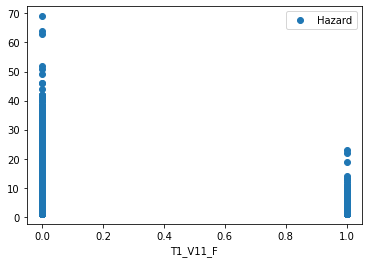

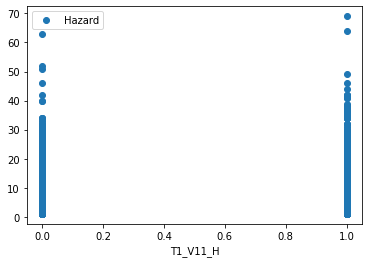

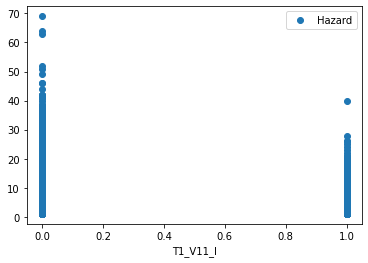

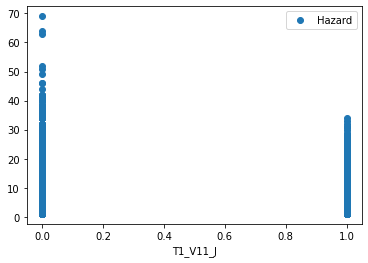

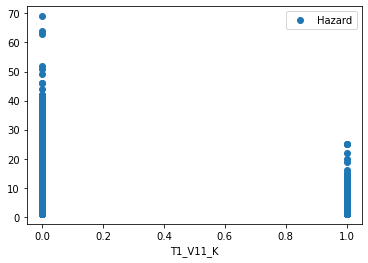

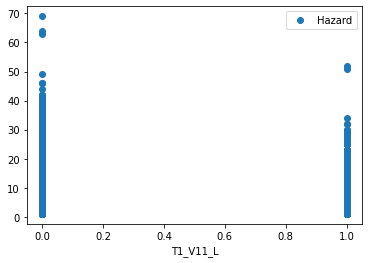

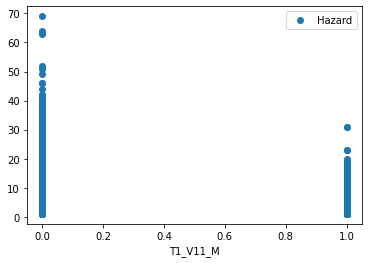

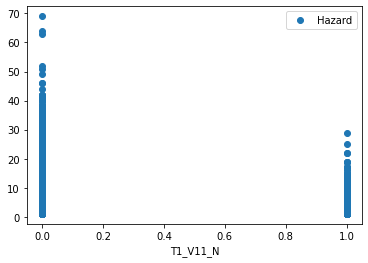

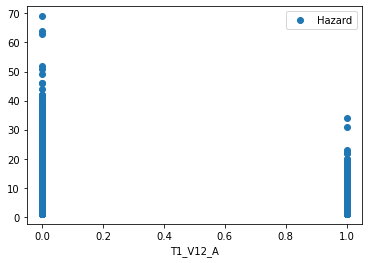

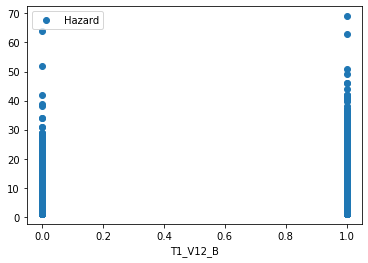

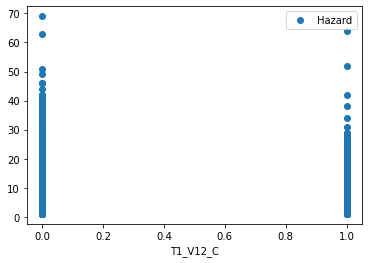

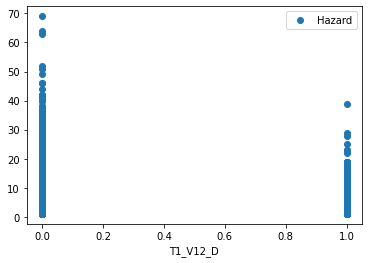

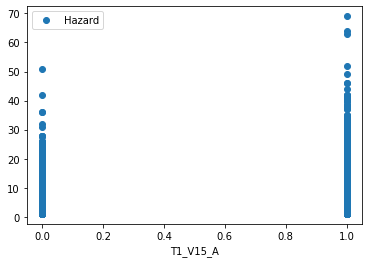

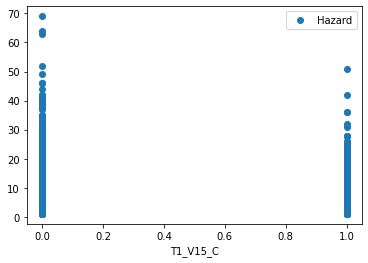

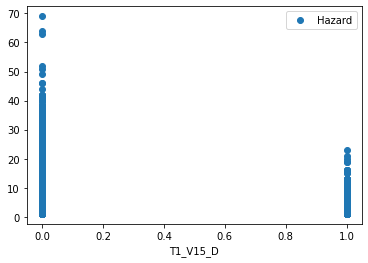

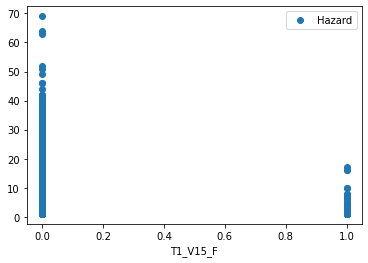

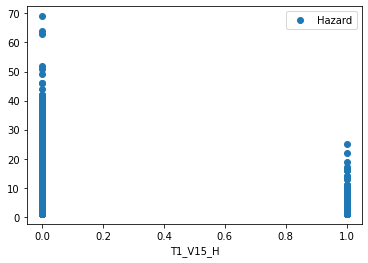

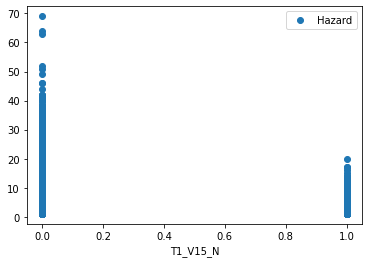

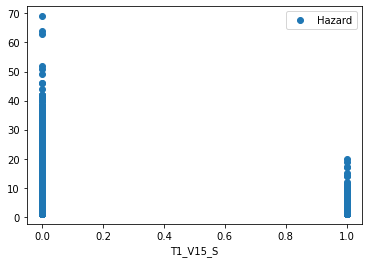

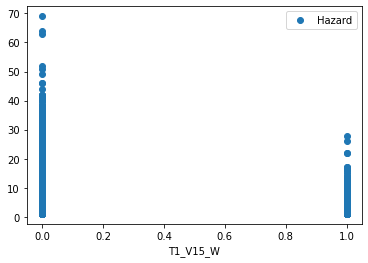

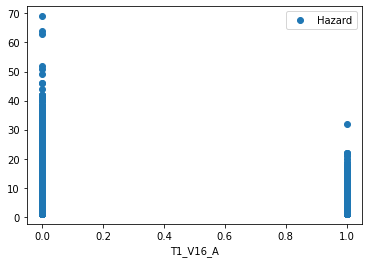

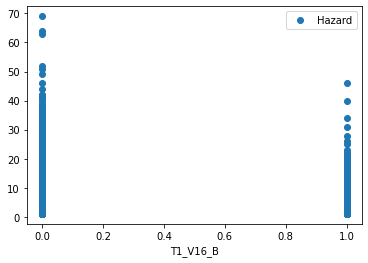

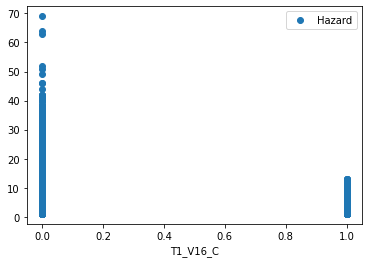

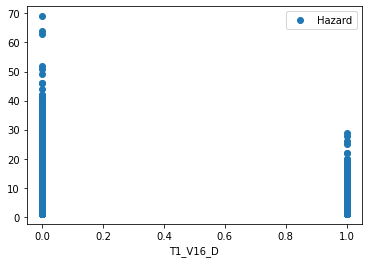

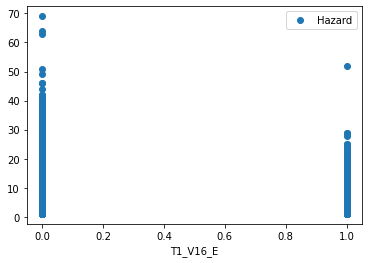

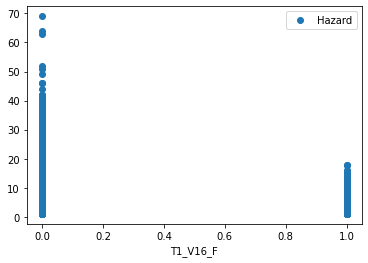

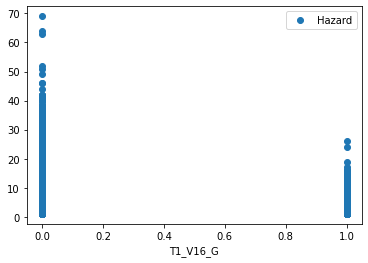

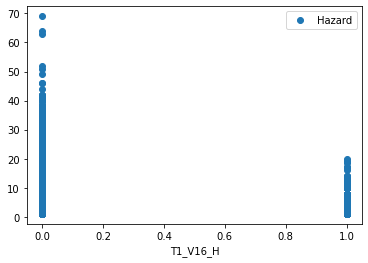

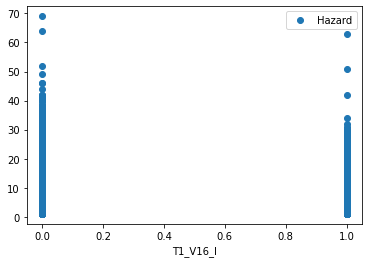

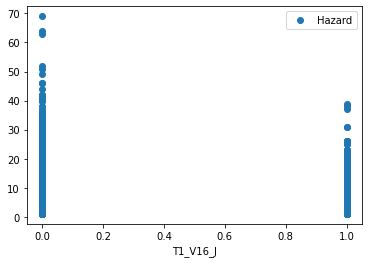

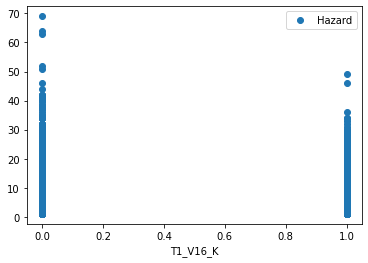

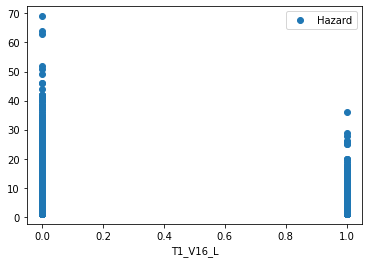

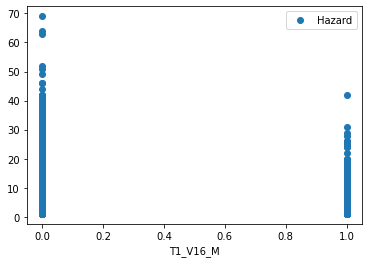

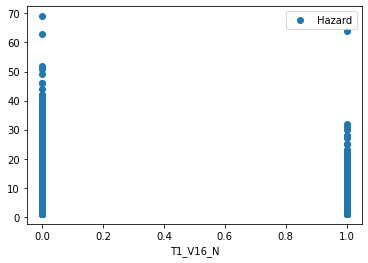

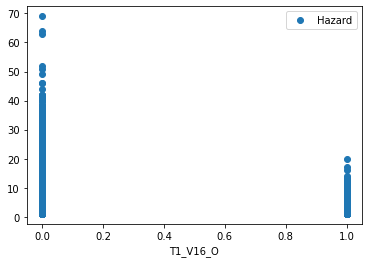

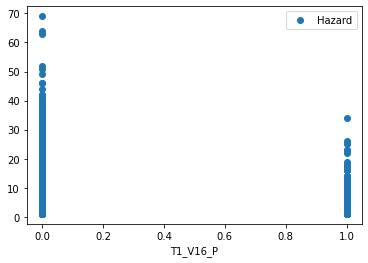

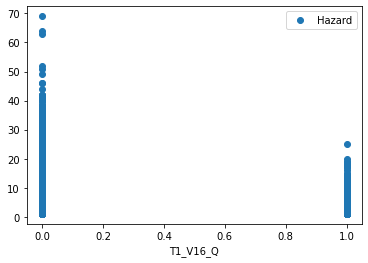

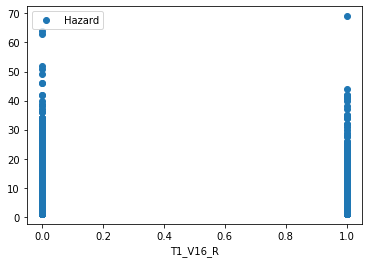

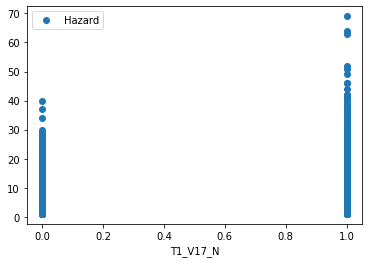

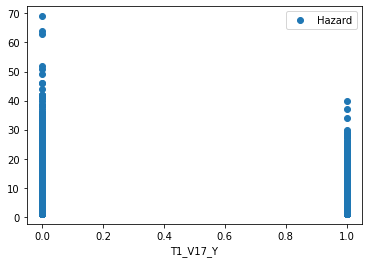

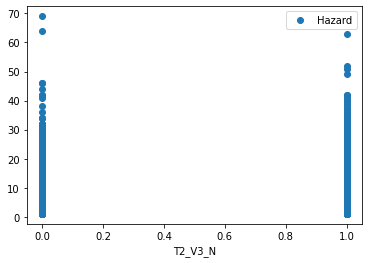

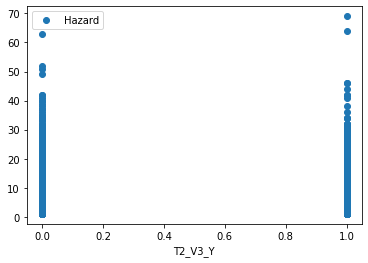

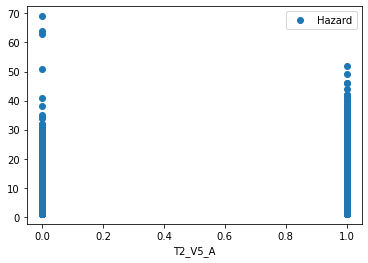

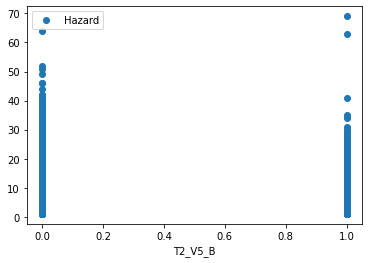

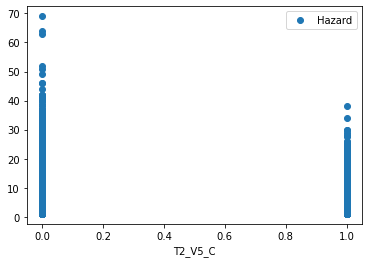

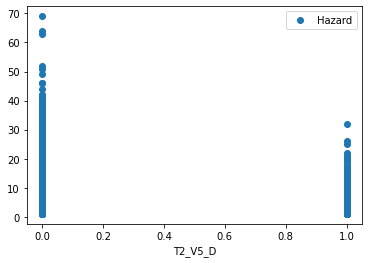

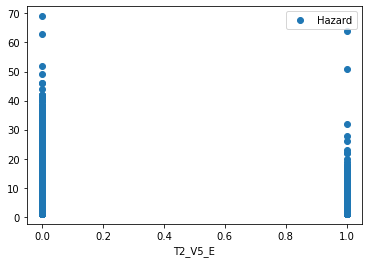

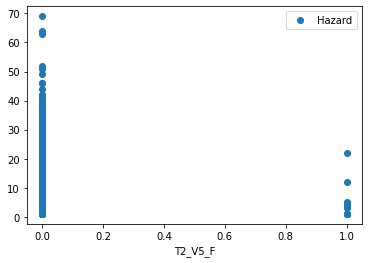

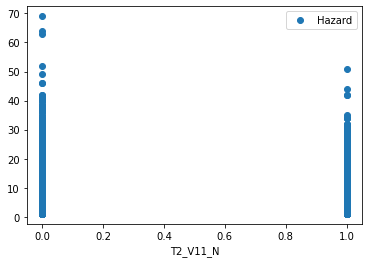

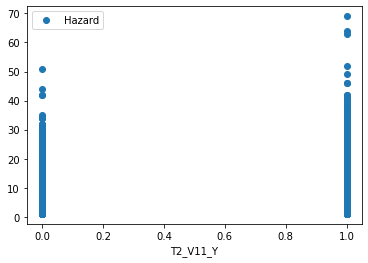

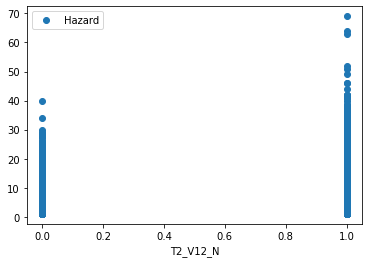

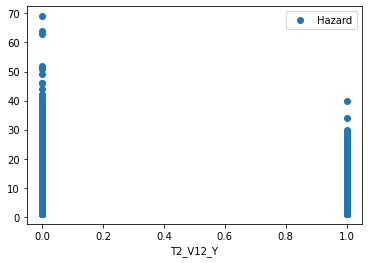

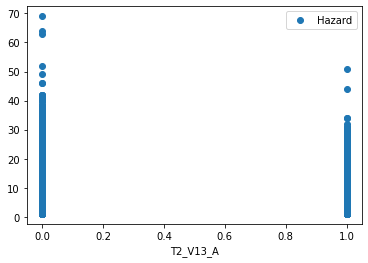

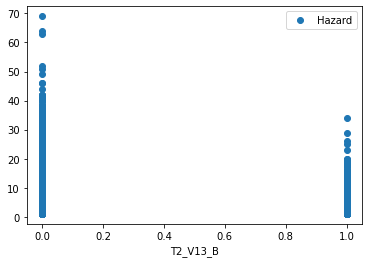

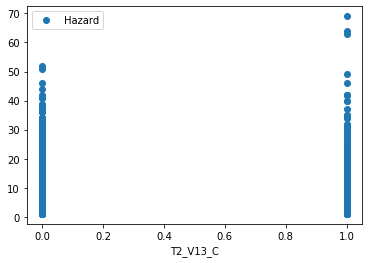

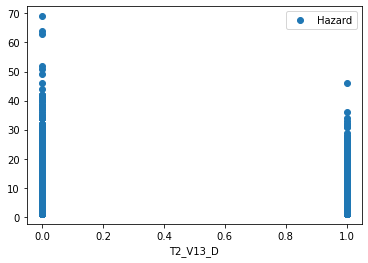

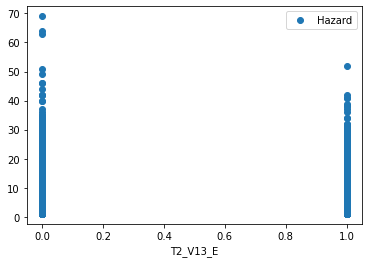

In [10]:
#Prevent any warnings from creating to many plots
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

#create a list of all the columns in the new dataset
column_list=inspection_data_dummies.columns.tolist()
#loop through each column, and plot it against the Hazrad variable
# do not create a plot of Hazard vs Hazard
for var_name in column_list:
    print(var_name)
    if var_name != 'Hazard':
        inspection_data_dummies.plot(x=var_name, y='Hazard', style='o')

In [11]:
#Try multiple different methods of predicting the Hazard variable using Random Forrest
#1 Random Forrest Regression with all variables
#2 Random Forrest Regression with variables selected based off of feature importance


#1 Random Forrest Regression with all variables
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

x_train=inspection_data_dummies.drop(['Hazard'],axis=1)


y_train=inspection_data_dummies['Hazard']

cls=RandomForestRegressor(n_estimators=200)

results=cls.fit(x_train, y_train)






In [12]:
#Analyze metrics from Random Forrest Regression
#Analyze score, mean square error, and variance 
#Use a data dictionary and data frame to store the results

from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

print(cls.score(x_train, y_train))

train_preds = cls.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(rmse)

statistics.variance(train_preds)

random_results={}
random_results['Method']='Random Forrest Regression'
random_results['score']=cls.score(x_train, y_train)
random_results['mse']=sqrt(mse)
random_results['variance']=statistics.variance(train_preds)

results_frame=pd.DataFrame()

results_frame = results_frame.append(random_results, ignore_index=True)


0.8740911173521106
1.4268519108916693


In [13]:
#2 Random Forrest Regression with variables selected based off of feature importance


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#Use select from model to select features with who have more importance
sel = SelectFromModel(RandomForestClassifier(n_estimators = 200))
sel.fit(x_train, y_train)


print(sel.get_support())

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True False False False False  True False False
 False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False False  True False False False False
  True False  True]


In [14]:
print(type(sel.get_support()))
#create a list of variables with the most importance
selected_feat= x_train.columns[(sel.get_support())]
print(selected_feat)
list_select=selected_feat.to_list()

#select variables with importance, and only use them to train the model
x_train_slm=inspection_data_dummies[list_select]


y_train=inspection_data_dummies['Hazard']

cls_slim=RandomForestRegressor(n_estimators=200)

results_slm=cls_slim.fit(x_train_slm, y_train)

print(cls_slim.score(x_train_slm, y_train))

train_preds_slm = cls_slim.predict(x_train_slm)
mse_slm = mean_squared_error(y_train, train_preds_slm)
rmse_slm = sqrt(mse_slm)
print(rmse_slm)

statistics.variance(train_preds_slm)

#Analyze metrics from Random Forrest Regression with feature selection
#Analyze score, mean square error, and variance 
#Use a data dictionary and data frame to store the results

random_results_slm={}
random_results_slm['Method']='Random Forrest Regression with Feature Selection'
random_results_slm['score']=cls_slim.score(x_train_slm, y_train)
random_results_slm['mse']=sqrt(mse_slm)
random_results_slm['variance']=statistics.variance(train_preds_slm)


results_frame = results_frame.append(random_results_slm, ignore_index=True)






<class 'numpy.ndarray'>
Index(['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1',
       'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V9', 'T2_V10', 'T2_V14',
       'T2_V15', 'T1_V4_B', 'T1_V4_N', 'T1_V6_N', 'T1_V6_Y', 'T2_V3_N',
       'T2_V3_Y', 'T2_V11_Y', 'T2_V13_C', 'T2_V13_E'],
      dtype='object')
0.8652166243645241
1.4762804915686158


In [15]:
#Analyze results to determine what is the best method to use 
#Random Forrest Regression with Feature Selection performs slightly worse, but seems less likely for over training due to 
#less variance
print(results_frame)

                                             Method       mse     score  \
0                         Random Forrest Regression  1.426852  0.874091   
1  Random Forrest Regression with Feature Selection  1.476280  0.865217   

   variance  
0  7.747556  
1  7.288111  


In [16]:
#Apply Random Forrest Regression with Feature Selection to test dataset
#read in dataset
inspection_data_test=pd.read_csv("C:/Users/emccall/Downloads/liberty-mutual-group-property-inspection-prediction/test.csv")
#No missing values in test dataset
print(inspection_data_test, inspection_data_test.dropna())

#Drop ID variables and create dummy variables
inspection_data_test_no_id=inspection_data_test.drop(['Id'],axis=1)

inspection_data_test_dummies=pd.get_dummies(inspection_data_test_no_id)



#Run the Random Forrest Regression with Feature Selection, using trim set of predictors

x_test=inspection_data_test_dummies[list_select]


y_pred=cls_slim.predict(x_test)


#Create dataset for submission 
inspection_data_test['Hazard'] = y_pred

final_prediction_set=inspection_data_test[['Id', 'Hazard']]


final_prediction_set.to_csv("C:/Users/emccall/Downloads/liberty-mutual-group-property-inspection-prediction/test_predictions.csv", index=False)

           Id  T1_V1  T1_V2  T1_V3 T1_V4 T1_V5 T1_V6 T1_V7 T1_V8 T1_V9  ...  \
0           6      2     13      4     C     A     Y     B     B     D  ...   
1           7     10     10      7     N     C     Y     B     B     D  ...   
2           8      9     20      4     N     H     Y     B     B     E  ...   
3           9     11     18      2     N     H     Y     B     B     D  ...   
4          10      4      5      4     H     K     Y     B     B     E  ...   
...       ...    ...    ...    ...   ...   ...   ...   ...   ...   ...  ...   
50995  101989      7     17      1     N     A     Y     B     B     D  ...   
50996  101990      6      6      2     N     K     Y     B     B     E  ...   
50997  101995     13     24      3     W     C     Y     B     B     D  ...   
50998  101996      9      7      5     N     C     Y     B     D     B  ...   
50999  101997      4      6      2     N     A     N     B     B     D  ...   

       T2_V6 T2_V7 T2_V8  T2_V9  T2_V10 T2_V11 T2_V